### How Computer Vision Works
Computer vision is the ability of a computer to recognize items beyond just storing their pixels

Each of our images is a set of 784 values (28 × 28) between 0 and 255. Given that we have 784 x values per image and our y is going to be between 0 and 9, a simple equation like y = mx + c isn’t going to be enough to solve the problem.

In [3]:
import torch
import torch.nn as nn
import  torch.optim as optim
from torchvision import datasets,transforms
from torch.utils.data import DataLoader

 when we train our neural network, we have two goals. We want to be able to feed in a 28 × 28–pixel array, and we want the neurons in the middle layer to have weights and biases (w and B values) that, when combined, will match those pixels to one of the 10 output values.
 
Training a model with the Fashion MNIST data.


In [4]:
# function to calculate accuracy (training)
def get_accuracy(pred,labels):
    _,predictions = torch.max(pred,1)
    correct = (predictions==labels).float().sum()
    accuracy = correct/labels.shape[0]
    return accuracy

In [5]:
## Load the dataset
transform = transforms.Compose([transforms.ToTensor()])
## Data comes from torchvision library,
train_dataset = datasets.FashionMNIST(root='./data',train=True,download=True,transform=transform)
test_dataset = datasets.FashionMNIST(root='./data',train=False,download=True,transform=transform)

train_loader = DataLoader(train_dataset,batch_size=8,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=8,shuffle=False)

## define the model
# subclasses nn.Module, which gives you the ability to override its forward method.
class FashionMNISTModel(nn.Module):
    def __init__(self):
        super(FashionMNISTModel,self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28,128),
            nn.ReLU(),
            nn.Linear(128,10),
            nn.LogSoftmax(dim=1)
        )

    def forward(self,x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
model  = FashionMNISTModel()

## define the loss function and optimizer
loss_function = nn.NLLLoss()
optimizer = optim.Adam(model.parameters())
'''
model.parameters() 
as a parameter to this. This parameter passes all the trainable 
parameters in the model to the optimizer so that it can adjust 
them to help minimize the loss calculated by the loss function.
'''
# train the model
def train(dataloader,model,loss_fn,optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch,(X,y) in enumerate(dataloader):
        # compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred,y)
        accuracy = get_accuracy(pred,y)
        # backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch%10000 == 0:
            current = batch * len(X)
            avg_loss = loss / (batch + 1)
            avg_accuracy = accuracy / (batch + 1) * 100
            print(f"Batch {batch}, Loss: {avg_loss:>7f}, Accuracy: {avg_accuracy:>0.2f}% [{current:>5d}/{size:>5d}]")

'''
batch is to take a chunk of that data—which, by default, is 64 
items—and work with it. Enumerating the data loader gives us 
that, so we’ll train with 938 batches, 937 of 64, and the last 
one of 32 because you can’t evenly divide 60,000 by 64!
'''
# Training process
epochs = 5
for t in range(epochs):
    print(f"Epoch{t+1}\n---------------------------------")
    train(train_loader,model,loss_function,optimizer)
print("Training Completed")

Epoch1
---------------------------------
Batch 0, Loss: 2.249779, Accuracy: 0.00% [    0/60000]
Epoch2
---------------------------------
Batch 0, Loss: 0.145364, Accuracy: 87.50% [    0/60000]
Epoch3
---------------------------------
Batch 0, Loss: 0.249866, Accuracy: 87.50% [    0/60000]
Epoch4
---------------------------------
Batch 0, Loss: 0.130959, Accuracy: 87.50% [    0/60000]
Epoch5
---------------------------------
Batch 0, Loss: 1.083208, Accuracy: 62.50% [    0/60000]
Training Completed


In [6]:
# function to test the model
def test(dataloader,model):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()# set the model to evalution mode
    test_loss,correct = 0,0
    with torch.no_grad():
        for X,y in dataloader:
            pred = model(X)
            test_loss += loss_function(pred,y).item()
            correct +=(pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /=size
    print(f"Test Error:\n Accuracy: {(100*correct):>0.1f}%,Avg loss :{test_loss:8f}\n")

# Evaluate the model
test(test_loader,model)

Test Error:
 Accuracy: 87.1%,Avg loss :0.368688



tensor([[-1.6885e+01, -2.4493e+01, -2.8579e+01, -2.5021e+01, -2.4524e+01,
         -7.6333e+00, -1.8274e+01, -5.5638e+00, -1.4783e+01, -4.3281e-03]])


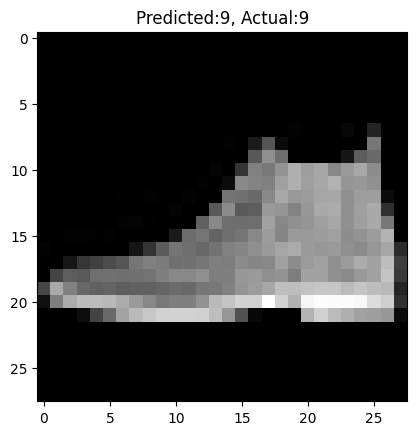

The model predicted 9,and the actual label is 9.


In [7]:
import matplotlib.pyplot as plt
def predict_single_image(image,label,model):
    model.eval()
# unsqueeze image as the model expects a batch dimension
    image = image.unsqueeze(0)
    with torch.no_grad():
        prediction = model(image)
        print(prediction)
        predicted_label = prediction.argmax(1).item()

    plt.imshow(image.squeeze(),cmap='gray')
    plt.title(f'Predicted:{predicted_label}, Actual:{label}')
    plt.show()
    return predicted_label
# chose an image from the test set
image,label = test_dataset[0]
# predict the class for the chosen image
predicted_label = predict_single_image(image,label,model)
print(f"The model predicted {predicted_label},and the actual label is {label}.")



* This process of early stopping is very powerful in helping you save time as you evaluate different model architectures for solving specific problems. It helps you train your model until it’s “good enough,” instead of having a fixed training loop. For example, the process can look like this:

* To do better at vision, you may need the computer to learn features of an image instead of learning merely the raw pixels. You can do that with a process called convolutions, and in the next chapter, you’ll learn how to define convolutional neural networks to understand the contents of images.